In [19]:
!pip install torch==2.2.2+cu118 torchvision==0.17.2+cu118 torchaudio==2.2.2 --extra-index-url https://download.pytorch.org/whl/cu118

!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118


In [20]:
import torch
torch.cuda.is_available()

True

In [21]:
#

from roboflow import Roboflow
rf = Roboflow(api_key="7k9MY7roO7ELVyHdYh7L")
project = rf.workspace("detectionfortrianing").project("fruitdetection-x6tde")
version = project.version(2)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...


In [22]:
! pip install ultralytics --upgrade

In [23]:
!yolo task=detect mode=train epochs=10 data=/kaggle/working/FruitDetection-2/data.yaml model=yolov8m.pt patience=10 


Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.2.2+cu118 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/FruitDetection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=T

In [25]:
import os
os.mkdir("/kaggle/working/object_detection")

FileExistsError: [Errno 17] File exists: '/kaggle/working/object_detection'

In [32]:
import shutil


shutil.copy("runs/detect/train/weights/best.pt", "/kaggle/working/object_detection/yolo_best.pt")
shutil.copy("runs/detect/train/weights/last.pt", "/kaggle/working/object_detection/yolo_last.pt")


'/kaggle/working/object_detection/yolo_last.pt'

In [33]:


#  the data.yaml (dataset configuration)
shutil.copy("/kaggle/working/FruitDetection-2/data.yaml", "/kaggle/working/object_detection/data.yaml")

#  the model.yaml (architecture configuration used during training)
shutil.copy("runs/detect/train/args.yaml", "/kaggle/working/object_detection/train_args.yaml")


'/kaggle/working/object_detection/train_args.yaml'

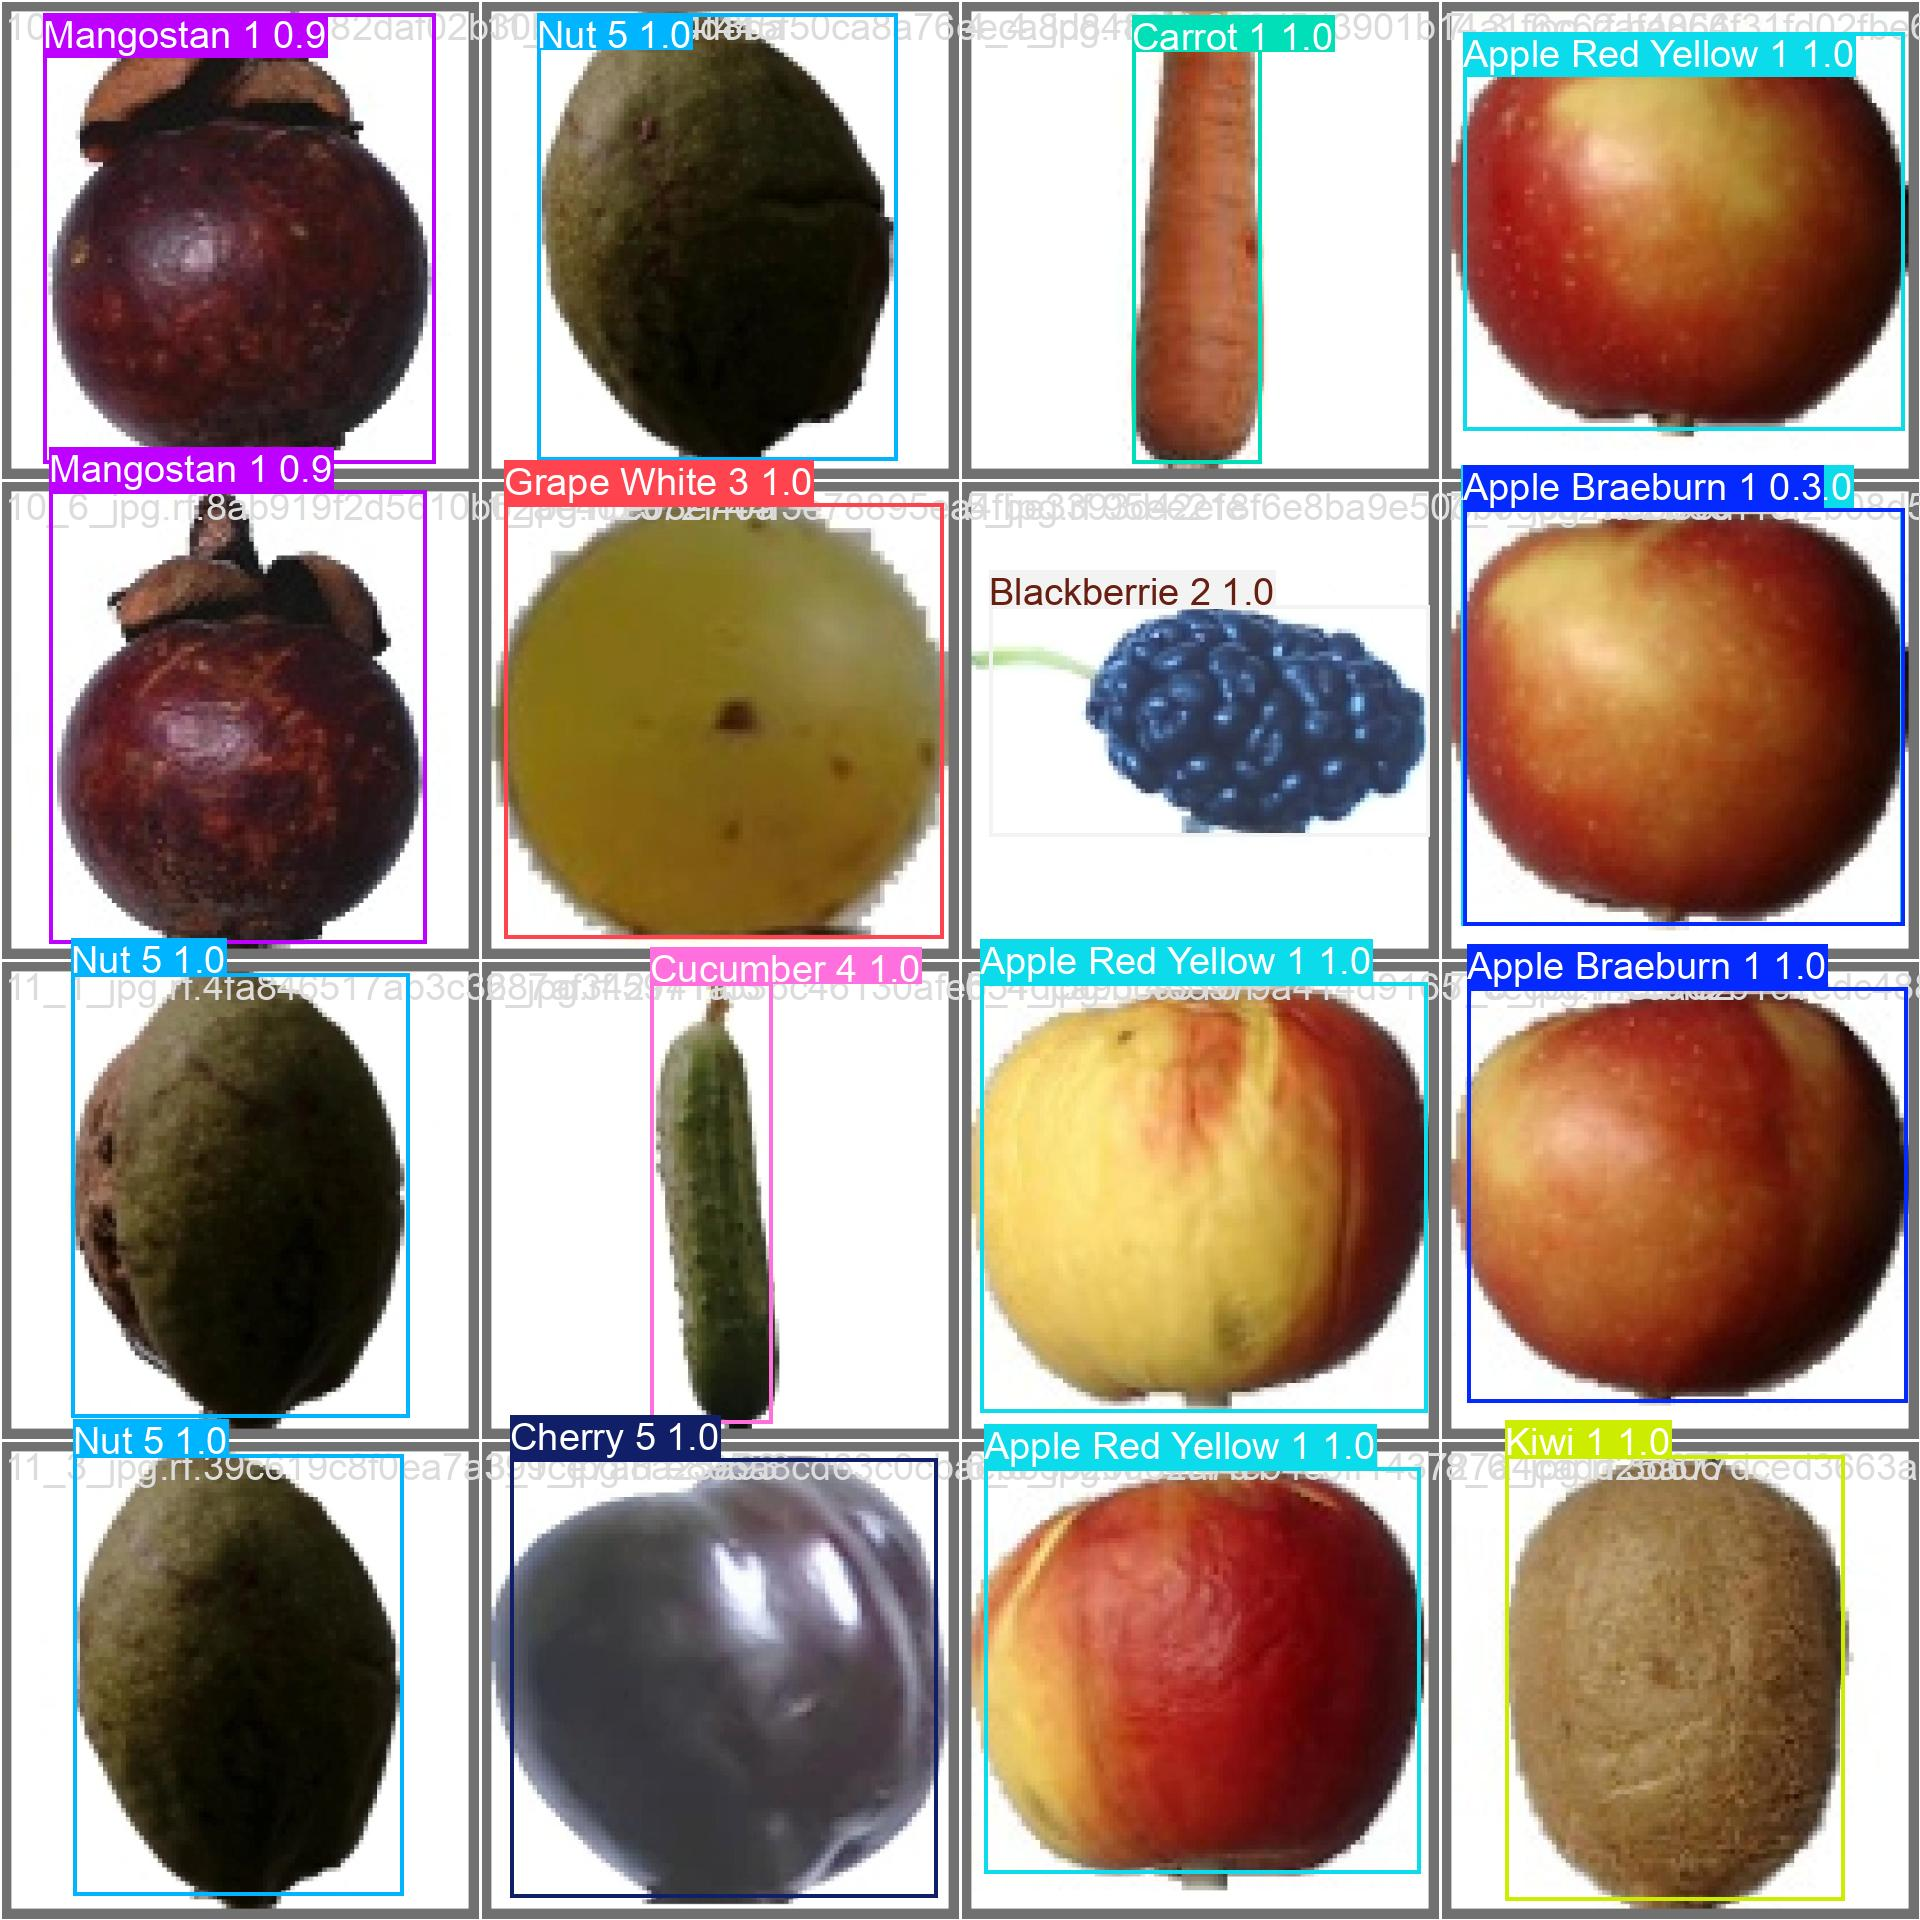

In [34]:
from IPython.display import display, Image

display(Image(filename="/kaggle/working/runs/detect/train/val_batch0_pred.jpg"))

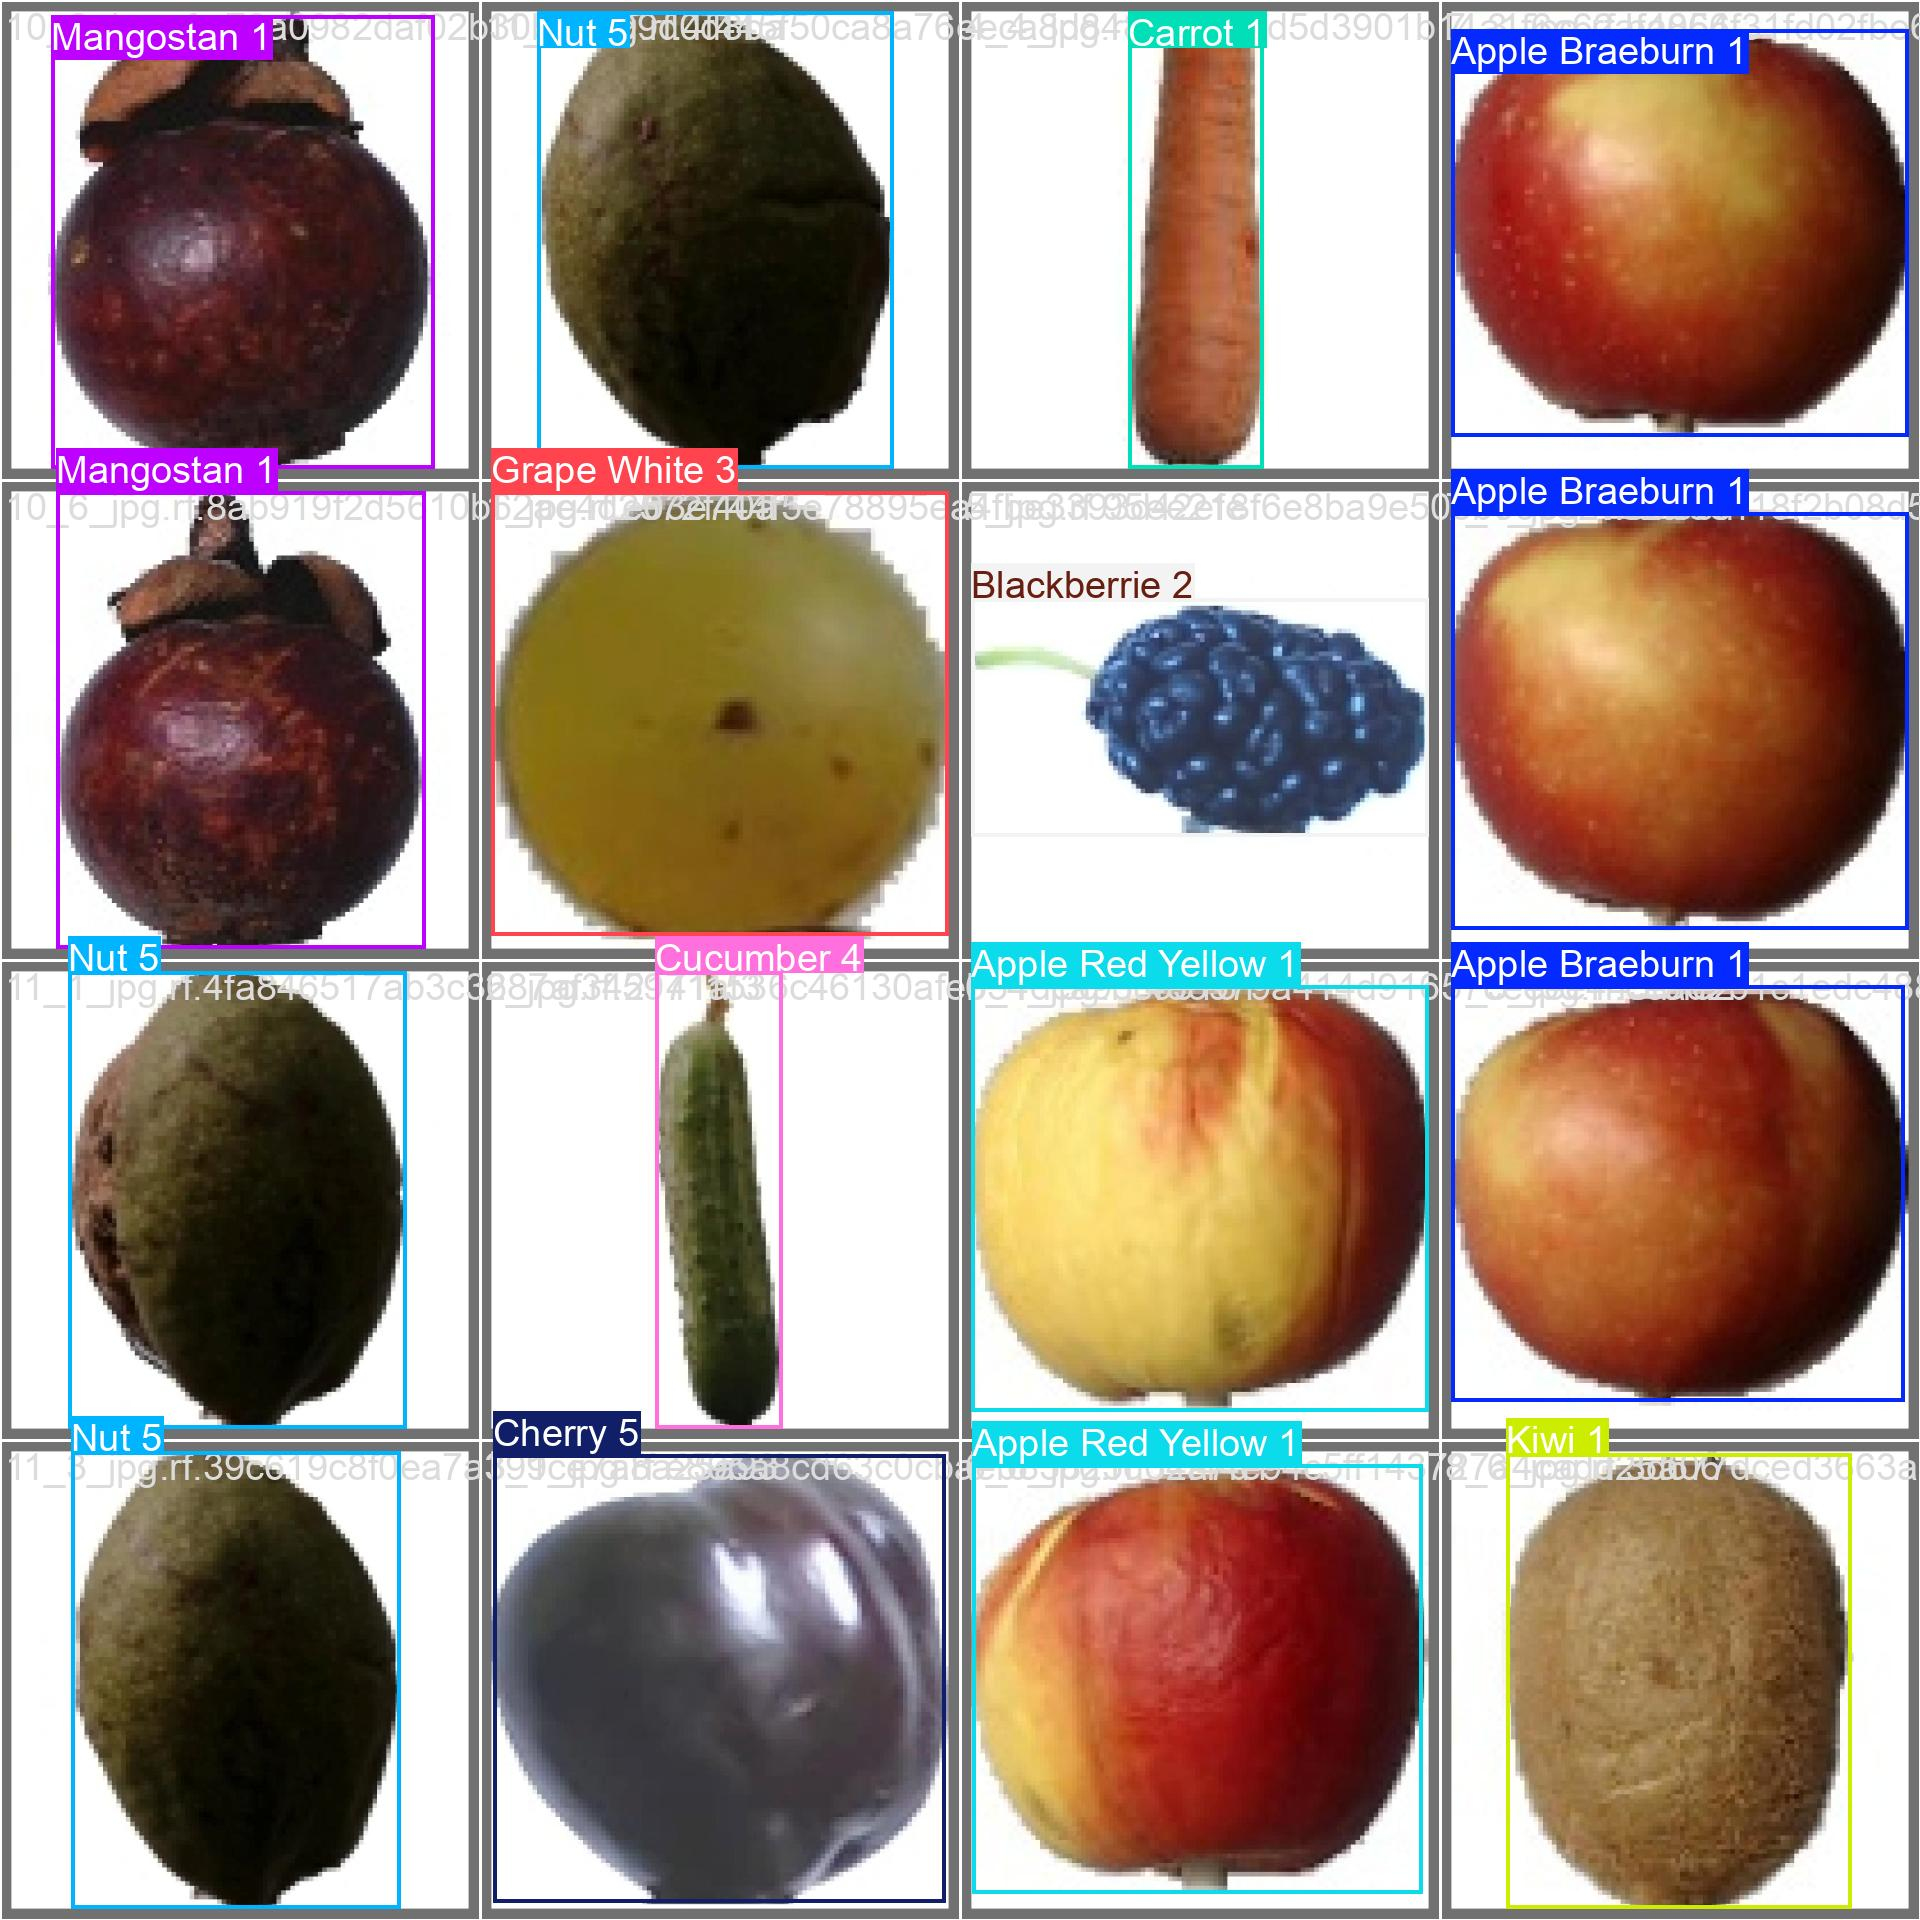

In [35]:
display(Image(filename="/kaggle/working/runs/detect/train/val_batch0_labels.jpg"))

In [36]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/working/FruitDetection-2/valid/images conf=0.5 save=True


Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.2.2+cu118 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs

image 1/19 /kaggle/working/FruitDetection-2/valid/images/10_2_jpg.rf.c70a0982daf02b30b0e599d0d8ba3bb8.jpg: 640x640 1 Mangostan 1, 15.5ms
image 2/19 /kaggle/working/FruitDetection-2/valid/images/10_6_jpg.rf.8ab919f2d5610b62ae4d2572f40a414e.jpg: 640x640 1 Mangostan 1, 15.3ms
image 3/19 /kaggle/working/FruitDetection-2/valid/images/11_1_jpg.rf.4fa846517ab3c3687af342141af3814d.jpg: 640x640 1 Nut 5, 15.3ms
image 4/19 /kaggle/working/FruitDetection-2/valid/images/11_3_jpg.rf.39c619c8f0ea7a399ce7a8a25a932453.jpg: 640x640 1 Nut 5, 15.3ms
image 5/19 /kaggle/working/FruitDetection-2/valid/images/11_5_jpg.rf.4f445f50ca8a76eeca8d8483dc204547.jpg: 640x640 1 Nut 5, 15.4ms
image 6/19 /kaggle/working/FruitDetection-2/valid/images/1_jpg.rf.e03e744f5e78895ea4fbe3393d42efe3.jpg: 640x640 1 Grape White 3, 15.3ms
image 7/19 /kaggle/

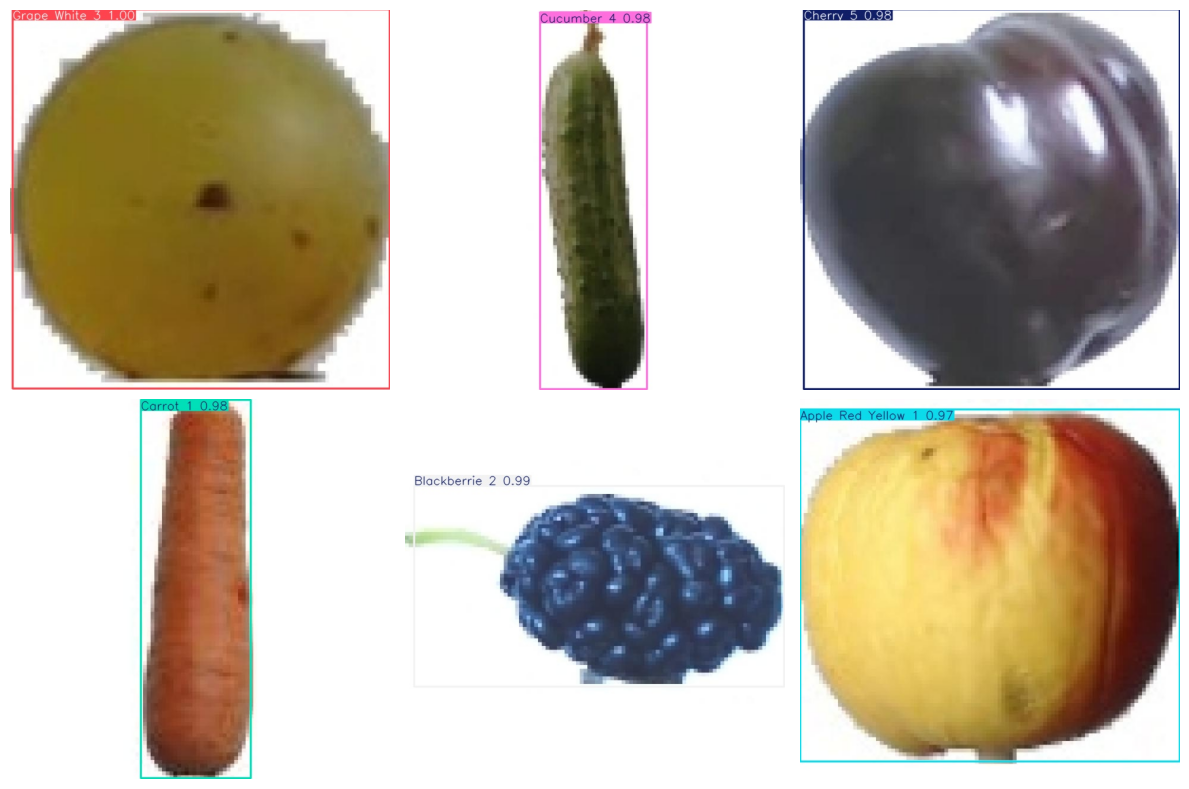

In [37]:
import os
import matplotlib.pyplot as plt
import cv2

# Path to YOLO prediction folder
pred_path = '/kaggle/working/runs/detect/predict'  # adjust if needed

# Get all image files in the folder
images = [f for f in sorted(os.listdir(pred_path)) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#labels = [l for l in os.listdir()]

# Display up to 6 images
plt.figure(figsize=(12, 8))
for i, img_file in enumerate(images[5:11]):  
    img = cv2.imread(os.path.join(pred_path, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()